## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

Per la valutazione si tale integrale utiliziamo l'importance sampling. Vogliamo valutare l'integrale n-dimesonale $$I=\int g(\textbf{x})p(\textbf{x})d\textbf{x}.$$ La distribuzione di probabilità $p(\textbf{x})$ non è detto sia la migliore per l'integrazione Monte Carlo, si può quindi scegliere una nuova distribuzione di probabilità $d(\textbf{x})$ riscrivendo l'integrale in questo modo:$$I=\int \bigg[\frac{g(\textbf{x})p(\textbf{x})}{d(\textbf{x})}\bigg]d(\textbf{x})d\textbf{x}$$, dove $d(\textbf{x})\geq 0$ e $\int d(\textbf{x})d\textbf{x}=1$. Per cui la distribuzione di probabilità che minimizza la varianza rispettando i vincoli sarà:
 $$d(\textbf{x})=\frac{g(\textbf{x})p(\textbf{x})}{I}$$. Qindi l'integrazione Monte Carlo può essere effettuata campionando la serie degli $X_i$ dalla distribuzione $d(\textbf{x})$ e si costruisce la somma:
 $$\tilde{I}=\frac{1}{N}\sum_{i=1}^{N}\frac{p(X_i)g(X_i)}{d(X_i)}=\frac{1}{N}\sum_{i=1}^{N}\frac{I}{N}=I.$$ Dato che tuttavia non conosciamo $I$ occore considerare delle funzioni simili per $d(\textbf{x})$ tale che $\frac{p(X_i)g(X_i)}{d(X_i)}$ sia limitata dall'alto.

1) sampling a uniform distribution in $[0,1]$

Deviazione Standard = 0.005093


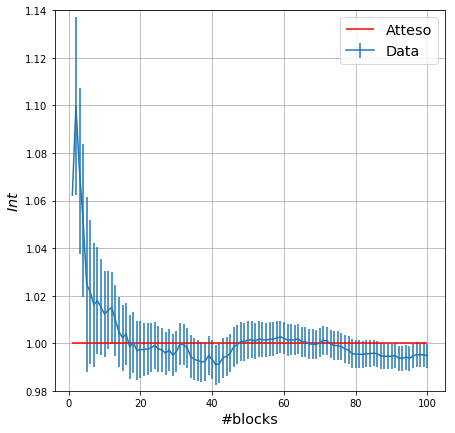

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math

x, mean, dev_std = np.loadtxt("Es2.0/integrale.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

plt.figure(figsize=(7,7))
plt.errorbar(x,mean,yerr=dev_std,label='Data')
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel(r'$Int$',fontsize='x-large')
plt.hlines(y=1.,xmin=min(x), xmax=max(x),color='r', linestyle='-',label="Atteso")
plt.ylim(0.98, 1.14)
plt.legend(fontsize='x-large')
print("Deviazione Standard =","%.6f" % dev_std[len(dev_std)-1])

plt.grid(True)
plt.show()

2) using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Si è scelto di utilizzare una distribuzione di probabilità $d(x)=2(1-x)$ in modo da campionare in maniera migliore la funzione $\cos(\pi x/2)$. Pertanto si sono estratti numeri utlizzando la seguente relazione:$$x=1-\sqrt{1-y}$$ con $y$ generato uniformemente tra $[0,1)$. Valutando l'integrale:
$$\tilde{I}=\frac{1}{N}\sum_{i=1}^{N}\frac{\pi}{4}\frac{\cos(\pi/2x)}{(1-x)}$$

Deviazione Standard = 0.001338


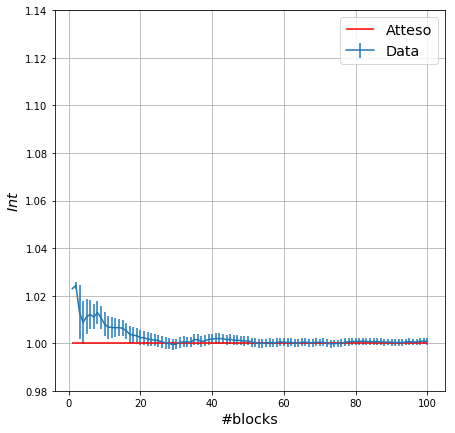

In [2]:
x, mean, dev_std = np.loadtxt("Es2.0/integrale.txt", usecols=(0,3,4), delimiter='\t', unpack='true')

plt.figure(figsize=(7,7))
plt.errorbar(x,mean,yerr=dev_std,label='Data')
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel(r'$Int$',fontsize='x-large')
plt.hlines(y=1.,xmin=min(x), xmax=max(x),color='r', linestyle='-',label="Atteso")
plt.ylim(0.98, 1.14)
plt.legend(fontsize='x-large')
print("Deviazione Standard =","%.6f" % dev_std[len(dev_std)-1])

plt.grid(True)
plt.show()

Si nota come utilizzando tale distribuzione di probabilità rispetto al caso uniforme si sia ridotta la deviazione standard e quindi la varianza e l'integrale si avvicina più velocemente al valore atteso.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

Un Random Walk è un processo di Markov. In particolare assumiamo un insieme di random variabili $X_1,X_2,\dots$ rappresentanti lo stato del sistema ad un certo "tempo" $n$ per $n=1,\dots,N$. Un processo di Markov è caratterizzato da una probabilità di andare dallo stato $i$ al tempo $n$ allo stato $j$ al tempo $n+1$:$$P_{ij}=P(X_{n+1}=j|X_n=i)$$ ovvero che dipende solamanete dallo stato precedente $i$ e non da tutti gli altri stati. In questo senso si dice che il processo non ha memoria.

La probabilità per un Random Walk di trovare una certa particella in una posizione $x$ ad un certo tempo $t$, nel limite continuo, segue la legge di diffusione e quindi assume la forma, nel caso 1D:$$P(x,t)=\frac{1}{(4\pi Dt)^{1/2}}e^{-\frac{x^2}{4Dt}}$$ Dove D è il coefficiente di diffusione e quindi si ha$\langle x_N \rangle=0$ e $\langle x_N^2 \rangle=2Dt$. Nel caso 3D si avrà invece  
$$P(x,t)=\frac{1}{(4\pi Dt)^{3/2}}e^{-\frac{x^2+y^2+z^2}{4Dt}}$$
e pertanto nel si avrà che: $\langle |\vec{r}_N|^2 \rangle_{RW}=6Dt$. Nel caso discreto 1D si avrà che: $\langle x_N^2 \rangle_= Na^2$ con $a$ passo reticolare, dato che $D=\frac{a^2}{2\tau}$ con $\tau$ il time step e $t=\frac{N}\tau$. Nel caso invece 3D possiamo assumere $1/3$ di step in ogni direzione ovvero $N_x=N_y=N_z=N/3$ e quindi:$\langle |\vec{r}_N|^2 \rangle_{RW}=Na^2$

In figura si riportano gli andamenti nel caso contnuo e nel caso discreto. Nel caso discreto si sono imposti salti solamente su un reticolo cubico di passo $a=1$ mentre nel caso continuo, ad ogni tempo discreto veniva effettuato un passo di lunghezza pari ad $a=1$ ma lungo una direzione casuale ottenuta campionando l'angolo solido ovvero $\phi \in [0,2\pi)$ e $\theta$ con distribuzione di probabilità $p(\theta)=\frac{1}{2}\sin\theta$ e quindi $\theta=\cos^{-1}(1-2r)$ con $r\in[0,1)$.

k_d = [0.99372304]
k_c = [0.99501412]


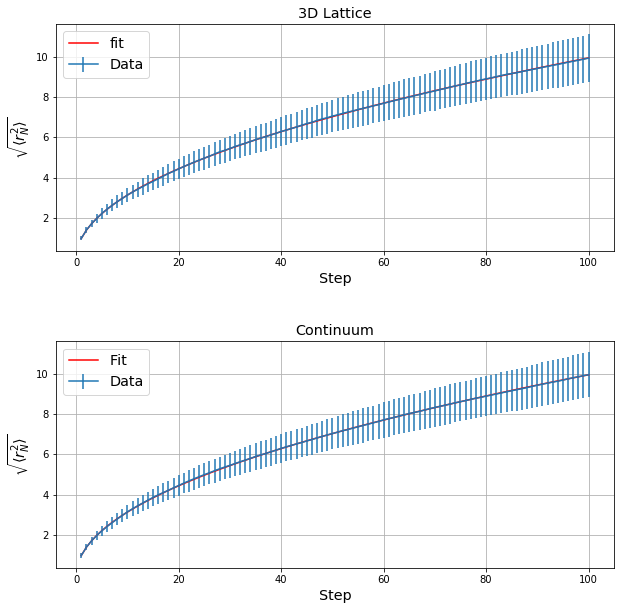

In [3]:
import pickle
from scipy import optimize

def diff(x, k):
  return k*(x)**(0.5) 

x_d, mean_d, dev_std_d = np.loadtxt("Es2.2/Lattice_random_walk.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x_c, mean_c, dev_std_c = np.loadtxt("Es2.2/Uniform_random_walk.txt", usecols=(0,1,2), delimiter='\t', unpack='true')

par_d, par_d_cov = optimize.curve_fit(diff, x_d, mean_d,p0=1.)
par_c, par_c_cov = optimize.curve_fit(diff, x_c, mean_c,p0=1.)
f, axarr = plt.subplots(2,1, sharey=True,figsize=(10,10))
f.subplots_adjust(hspace=0.4, wspace=0.4)

axarr[0].errorbar(x_d,mean_d,yerr=dev_std_d,label='Data')
axarr[0].plot(x_d,diff(x_d,par_d),color='r', linestyle='-',label='fit')
axarr[0].set_title('3D Lattice',fontsize='x-large')
axarr[0].set_xlabel('Step',fontsize='x-large')
axarr[0].set_ylabel(r'$\sqrt{\langle r_{N}^{2} \rangle}$',fontsize='x-large')
axarr[0].legend(fontsize='x-large')
axarr[0].grid(True)
print("k_d =",par_d)

axarr[1].plot(x_c,diff(x_c,par_c),color='r', linestyle='-',label='Fit')
axarr[1].errorbar(x_c,mean_c,yerr=dev_std_c,label='Data')
axarr[1].set_title('Continuum',fontsize='x-large')
axarr[1].set_xlabel('Step',fontsize='x-large')
axarr[1].set_ylabel(r'$\sqrt{\langle r_{N}^{2} \rangle}$',fontsize='x-large')
axarr[1].grid(True)
axarr[1].legend(fontsize='x-large')
print("k_c =",par_c)

plt.show()

Dai grafici si può notare un andamento diffusivo sia per il Random Walk discreto che continuo. Fittando con la funzione $f(x)=k\sqrt(x)$ entrambe i processi, si ha infatti un buon accordo con il valore atteso: $k\simeq\sqrt{a}=1$.